### Tommy Nguyen
### CS 185 Project



### Goal


1.   Observe and process the data for machine learning
2.   Compare results using 4 different machine learning models 
3.   Fine tune the best model to improve accuracy



Data from:
Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5

#Data gathering and details

In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# take .csv file and make it into a dataframe
csv_url = "https://www.sjsu.edu/people/wendy.lee/docs/CS185C02-Sp21/heart_disease_clinical_data.csv"
heart_data = pd.read_csv(csv_url)
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


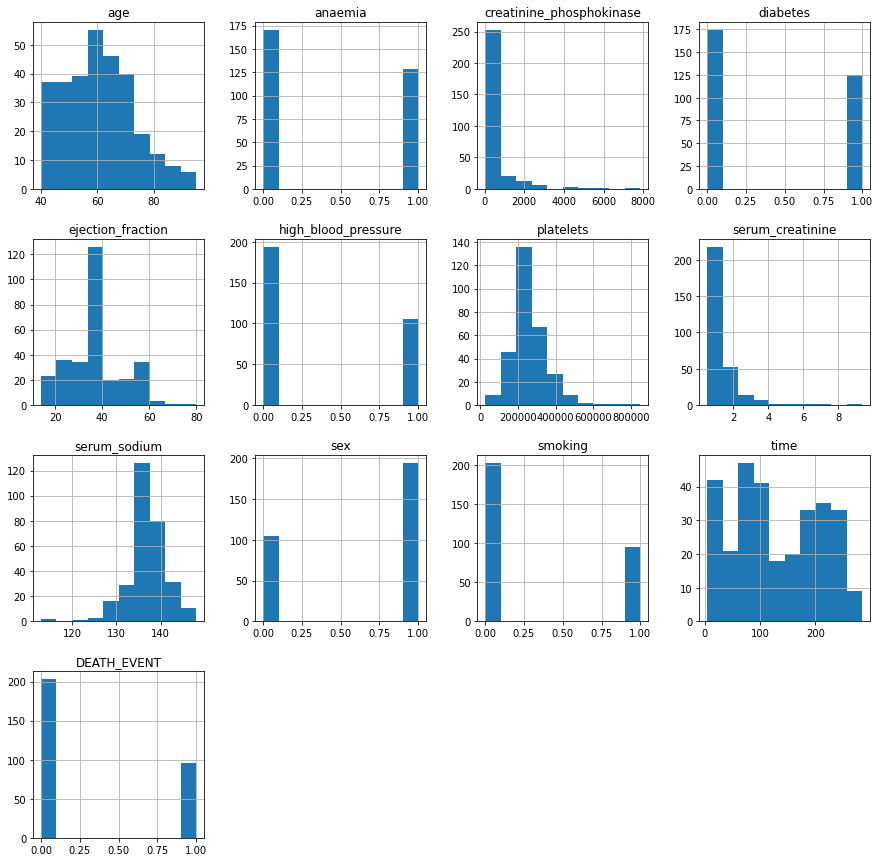

In [ ]:
heart_data.hist(figsize=(15,15));

In [ ]:
heart_data.age.value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
62.000     5
68.000     5
52.000     5
49.000     4
61.000     4
51.000     4
73.000     4
59.000     4
46.000     3
64.000     3
82.000     3
90.000     3
69.000     3
95.000     2
48.000     2
60.667     2
67.000     2
44.000     2
66.000     2
77.000     2
78.000     2
54.000     2
57.000     2
94.000     1
56.000     1
41.000     1
87.000     1
79.000     1
86.000     1
43.000     1
81.000     1
47.000     1
Name: age, dtype: int64

In [ ]:
heart_data['age_qcut_cat'] = pd.qcut(heart_data['age'], 
                                 q=5, 
                                 precision=1, 
)

In [ ]:
heart_data['age_qcut_cat'].value_counts()

(39.9, 50.0]    74
(63.0, 70.0]    66
(58.0, 63.0]    56
(70.0, 95.0]    52
(50.0, 58.0]    51
Name: age_qcut_cat, dtype: int64

In [ ]:
# split data using stratified sampling based on age
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 7)

for train_index, test_index in split.split(heart_data, heart_data["age_qcut_cat"]):
    heart_train_set = heart_data.loc[train_index]
    heart_test_set = heart_data.loc[test_index]

In [ ]:
def age_cat_proportions(data):
    return data["age_qcut_cat"].value_counts() / len(data)

#create training and testing sets by random sampling
rand_train_set, rand_test_set = train_test_split(heart_data, test_size = 0.2, random_state = 7)

compare_props = pd.DataFrame({
    "Overall": age_cat_proportions(heart_data),
    "Stratified": age_cat_proportions(heart_train_set),
    "Random": age_cat_proportions(rand_train_set),
}).sort_index()

#compare random sampling and stratified sampling
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [ ]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
"(39.9, 50.0]",0.247492,0.246862,0.255230,3.126767,-0.254439
"(50.0, 58.0]",0.170569,0.171548,0.184100,7.933383,0.574288
"(58.0, 63.0]",0.187291,0.188285,0.171548,-8.405559,0.530484
"(63.0, 70.0]",0.220736,0.221757,0.196653,-10.910359,0.462787
"(70.0, 95.0]",0.173913,0.171548,0.192469,10.669456,-1.359833


In [ ]:
print("Training set:", heart_train_set.shape)
print("Test set:", heart_test_set.shape)

Training set: (239, 14)
Test set: (60, 14)


In [ ]:
# categorical variables
cat_vars = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"]

# numerical variables
num_vars = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time", "DEATH_EVENT"]

#5 Questions

In [ ]:
# turn boolean into words for plotting purposes
heart_data_plot = heart_train_set.copy()
heart_data_plot.replace( {"anaemia":{ 0 : "False", 1 : "True"}}, inplace = True)
heart_data_plot.replace( {"diabetes":{ 0 : "False", 1 : "True"}}, inplace = True)
heart_data_plot.replace( {"high_blood_pressure":{ 0 : "False", 1 : "True"}}, inplace = True)
heart_data_plot.replace( {"sex":{ 0 : "Female", 1 : "Male"}}, inplace = True)
heart_data_plot.replace( {"smoking":{ 0 : "False", 1 : "True"}}, inplace = True)
heart_data_plot.replace( {"DEATH_EVENT":{ 0 : "Survived", 1 : "Dead"}}, inplace = True)

In [ ]:
#min max of serum_creatinine
print(heart_data_plot['serum_creatinine'].min())
print(heart_data_plot['serum_creatinine'].max())
#min max of ejection_fraction
print(heart_data_plot['ejection_fraction'].min())
print(heart_data_plot['ejection_fraction'].max())

0.6
9.0
15
70


In [ ]:
# convert wide-form to long-form
age_num_vars = num_vars.copy()
age_num_vars.remove('age')
age_num_vars.remove('DEATH_EVENT')
heart_cat_vars = heart_data_plot.drop(age_num_vars, axis=1).copy()
heart_cat_vars.drop("age_qcut_cat", axis =1, inplace=True)
heart_cat_tidy = heart_cat_vars.melt(
    id_vars=['age', 'DEATH_EVENT'],
    var_name="Categorical feature", 
    value_name="Has feature" 
)
heart_cat_tidy

,age,DEATH_EVENT,Categorical feature,Has feature
0,60.0,Survived,anaemia,True
1,72.0,Dead,anaemia,False
2,60.0,Survived,anaemia,True
3,85.0,Dead,anaemia,False
4,53.0,Survived,anaemia,True
...,...,...,...,...
1190,60.0,Survived,smoking,True
1191,60.0,Survived,smoking,True
1192,44.0,Survived,smoking,False
1193,66.0,Survived,smoking,False


In [ ]:
heart_cat_tidy['Has feature'].value_counts()

False     589
True      367
Male      161
Female     78
Name: Has feature, dtype: int64

##Question 1: What is the distribution of patients for serum creatinine and ejection fraction based on death event? 

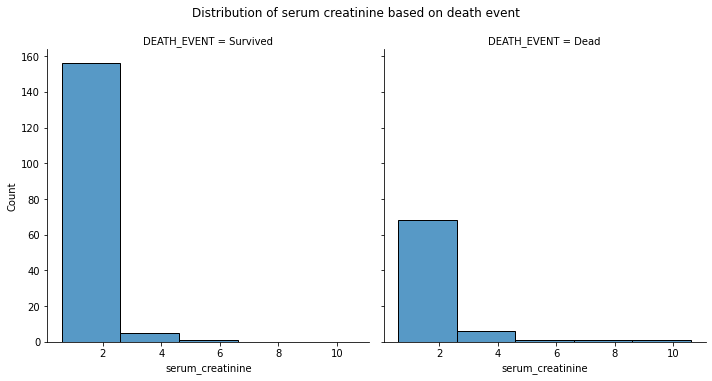

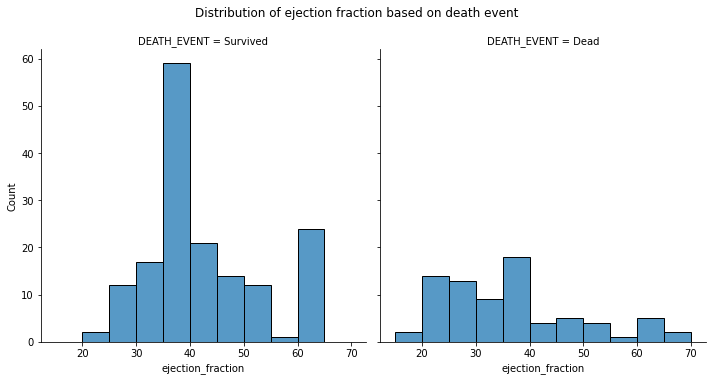

In [ ]:
death_event_coloring = {"Survived": "blue", "Dead" : "red"}
Q_1_1 = sns.displot(data=heart_data_plot,
              x="serum_creatinine",
              col='DEATH_EVENT',
              facet_kws=dict(margin_titles=True),
              binwidth=2,
              height=5,
              palette=death_event_coloring
              )
#g.set(xlim=(0.6, 9))
Q_1_1.fig.suptitle("Distribution of serum creatinine based on death event", y=1.05);

Q_1_2 = sns.displot(data=heart_data_plot,
              x="ejection_fraction",
              col='DEATH_EVENT',
              facet_kws=dict(margin_titles=True),
              binwidth=5,
              height=5,
              palette=death_event_coloring
              )
#h.set(xlim=(15, 70))
Q_1_2.fig.suptitle("Distribution of ejection fraction based on death event", y=1.05);

Majority of the patients that survived had a serum creatinine value around 0 and 2. As for ejection fraction, most patients that survived had a value around 35. As serum creatinine goes above 6, there are some cases of death for patients. Similiarly, there are cases where patients with ejection fraction values above 65 results in death. 

## Question 2: What is the pairwise relationship between numerical features based on death event? 

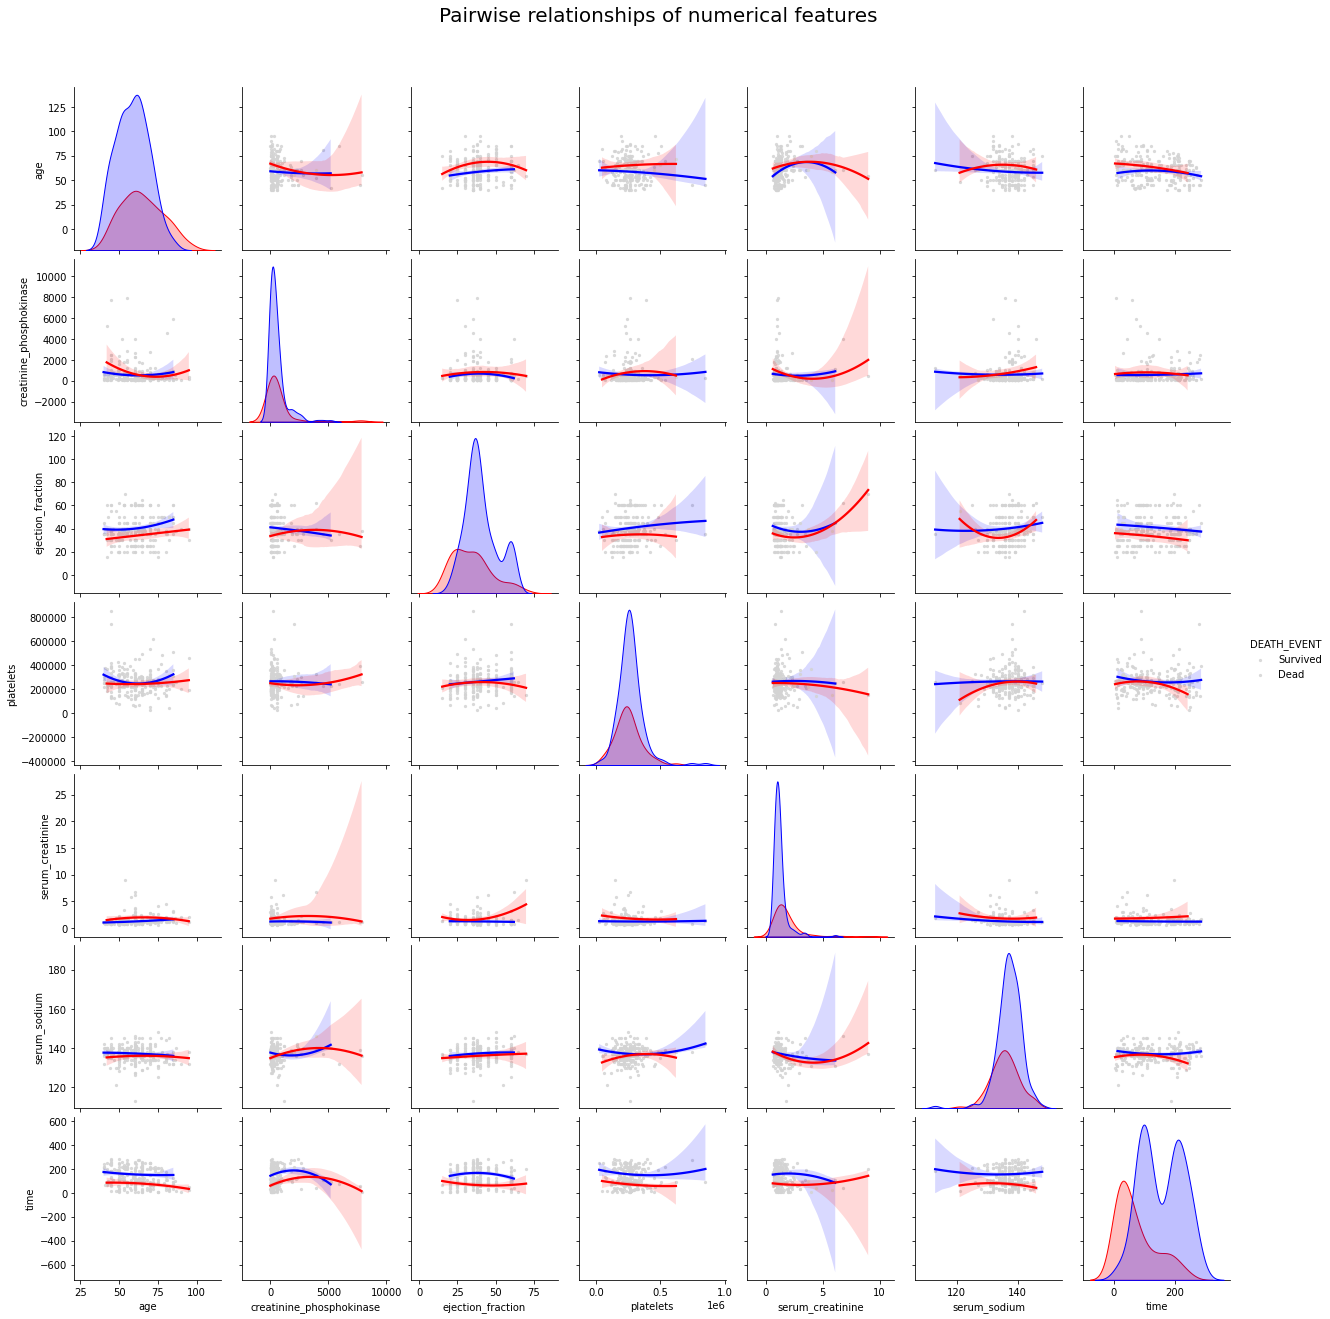

In [ ]:
death_event_coloring = {"Survived": "blue", "Dead" : "red"}
Q_2 = sns.pairplot(data=heart_data_plot[num_vars],
             hue = "DEATH_EVENT",
             kind = "reg",
             plot_kws={"scatter_kws":{"color":"lightgrey", "s":5}, "order": 2},
             palette=death_event_coloring
             );

Q_2.fig.suptitle("Pairwise relationships of numerical features",
                fontsize = 20,
                y=1.05);

Nothing too interesting. Serum creatinine and relative terms with Serum creatinine had positive correlation based on death (serum_sodium, creatinine_phosphokinase). Time had somewhat of a separation between survived and dead patients when compared with other numerical variables.  

## Question 3: What is the distribution of the categorical features based on death event?

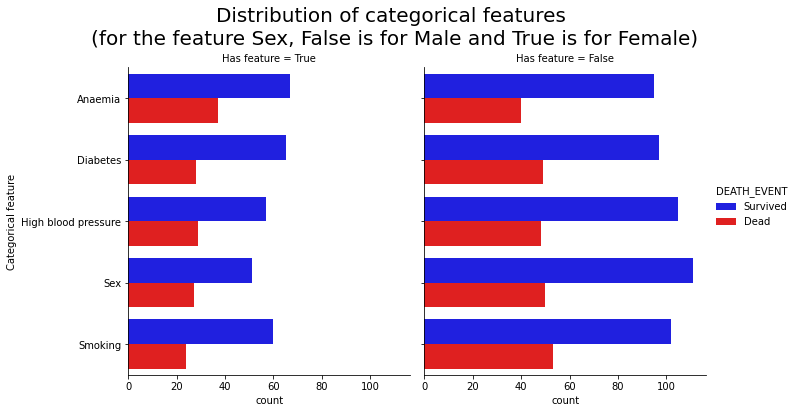

In [ ]:
y_labels=['Anaemia', 'Diabetes', 'High blood pressure', 'Sex', 'Smoking']
heart_cat_tidy_sex_tf = heart_cat_tidy.copy()
heart_data_plot.replace( {"sex":{ 0 : "Female", 1 : "Male"}}, inplace = True)
heart_cat_tidy_sex_tf.replace( { 'Has feature':{'Female': 'True' }}, inplace=True)
heart_cat_tidy_sex_tf.replace( { 'Has feature':{'Male': 'False' }}, inplace=True)

Q_3 = sns.catplot(data=heart_cat_tidy_sex_tf,
                y="Categorical feature", 
                hue="DEATH_EVENT", 
                col="Has feature", 
                kind="count",
                height=5, 
                aspect=1,
                palette=death_event_coloring);

Q_3.set_yticklabels(y_labels)
Q_3.fig.suptitle('Distribution of categorical features \n(for the feature Sex, False is for Male and True is for Female)', y=1.1, size=20);

Based on the distribution, patients that do not have anaemia, diabetes, or high blood pressure, will have a higher chance to survive. Smoking and sex seems to not have a huge effect on whether the patient will live or not.  

## Question 4: What is the distribution of patients based on age, sex, and  death event. 

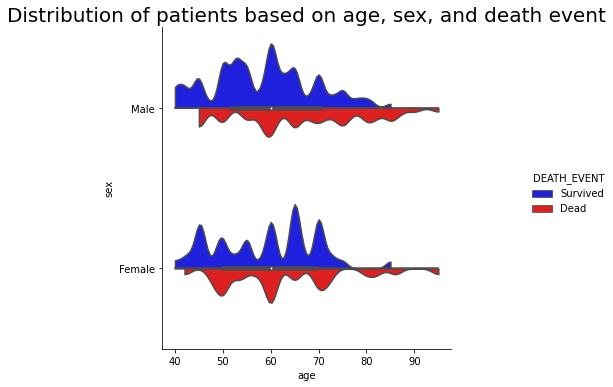

In [ ]:
sns.catplot(
    data=heart_data_plot,
    x="age",
    y="sex",
    kind="violin",
    cut=0,
    bw=0.1,
    scale="count",
    hue='DEATH_EVENT',
    palette=death_event_coloring,
    split=True
    ) 

plt.title("Distribution of patients based on age, sex, and death event", fontdict={'size': 20});

In [ ]:
heart_data_plot.groupby(['sex', 'DEATH_EVENT']).age.agg([len, min, max])

len   min   max
sex    DEATH_EVENT                   
Female Dead          27.0  42.0  95.0
       Survived      51.0  40.0  85.0
Male   Dead          50.0  45.0  95.0
       Survived     111.0  40.0  85.0

Based on the distribution of the patients, the starting dying male age is 45, while females' starting age is 42. Both genders have a maxima of 95 for patients that have died and a maxima of 85 for patients that survived. Majority of the distribution for dying males is around 60 and 70 while for dying females is around 60.  

## Question 5: What is the probability density function (PDF) of the numerical features?

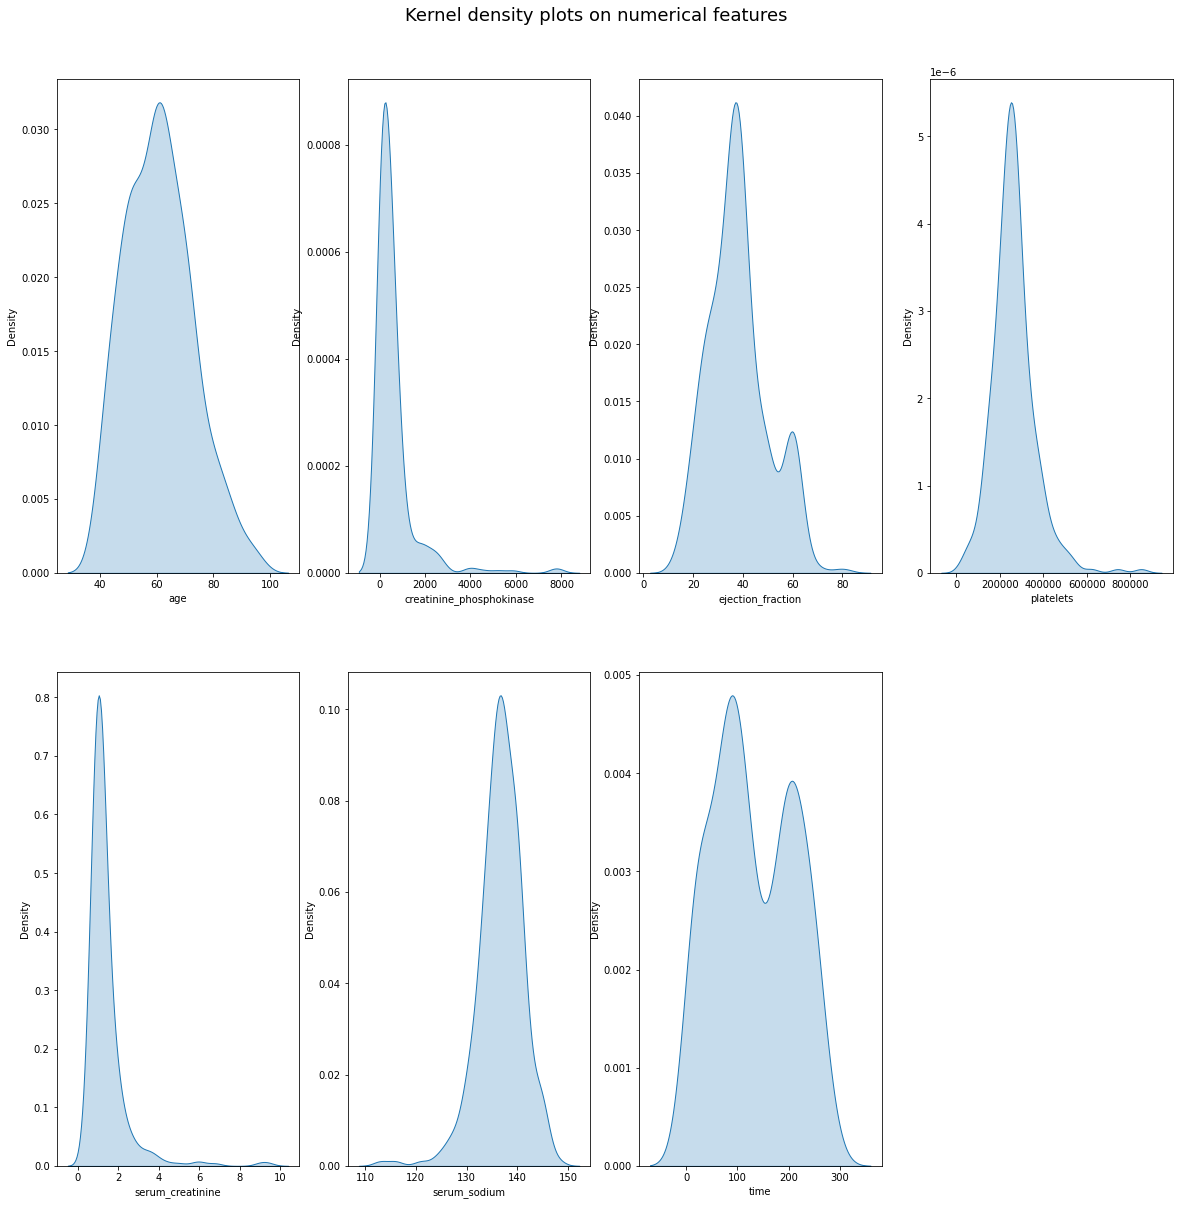

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 20))
fig.suptitle('Kernel density plots on numerical features', 
             fontsize = 18, y = 0.93);

sns.kdeplot(data=heart_data, x="age", ax=axes[0, 0], shade=True); 
sns.kdeplot(data=heart_data, x="creatinine_phosphokinase", ax=axes[0, 1], shade=True);
sns.kdeplot(data=heart_data, x="ejection_fraction", ax=axes[0, 2], shade=True);
sns.kdeplot(data=heart_data, x="platelets", ax=axes[0, 3], shade=True);
sns.kdeplot(data=heart_data, x="serum_creatinine", ax=axes[1, 0], shade=True);
sns.kdeplot(data=heart_data, x="serum_sodium", ax=axes[1, 1], shade=True);
sns.kdeplot(data=heart_data, x="time", ax=axes[1, 2], shade=True);
axes[1,3].set_axis_off()

Platelets, serum sodium, and age are close to a normal distribution. However, age would be the closest to a normal distribution due to how broad the density is compared to serum sodium and platelets. 

#Transforming data and pipeline

In [ ]:
heart_train_set.drop('age_qcut_cat', axis=1, inplace=True)
heart_test_set.drop('age_qcut_cat', axis=1, inplace=True)
cat_vars.remove('DEATH_EVENT')
num_vars.remove('DEATH_EVENT')

# target DEATH_EVENT
heart_training_labels = heart_train_set['DEATH_EVENT'].copy()
heart_train_set.drop("DEATH_EVENT", axis=1, inplace = True)

In [ ]:
# Pipeline
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),      
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_vars),
        ('cat', OrdinalEncoder(), cat_vars)
        ])

heart_train_prepared = full_pipeline.fit_transform(heart_train_set)

heart_train_prepared

array([[-0.05356122, -0.37159809, -1.15710593, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.97052923, -0.24522341, -1.58679567, ...,  1.        ,
         1.        ,  1.        ],
       [-0.05356122,  0.43700982,  0.56165303, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.41901515, -0.51127537,  0.13196329, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.45848401, -0.52647834, -0.0399126 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.82162905, -0.03808296, -0.29772645, ...,  0.        ,
         1.        ,  1.        ]])

#Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

In [ ]:
# logisitic regression
lr_model = LogisticRegression(random_state = 7, solver ='lbfgs') 
lr_model.fit(heart_train_prepared, heart_training_labels)
lr_scores5 = cross_val_score(lr_model, heart_train_prepared, heart_training_labels, cv = 5)
lr_scores6 = cross_val_score(lr_model, heart_train_prepared, heart_training_labels, cv = 6)
lr_scores7 = cross_val_score(lr_model, heart_train_prepared, heart_training_labels, cv = 7)
lr_scores8 = cross_val_score(lr_model, heart_train_prepared, heart_training_labels, cv = 8)
lr_scores9 = cross_val_score(lr_model, heart_train_prepared, heart_training_labels, cv = 9)
lr_scores10 = cross_val_score(lr_model, heart_train_prepared, heart_training_labels, cv = 10)
print("Logistic Regression Accuracy CV = 5: %0.2f (+/- %0.2f)" % (lr_scores5.mean(), lr_scores5.std() * 2))
print("Logistic Regression Accuracy CV = 6: %0.2f (+/- %0.2f)" % (lr_scores6.mean(), lr_scores6.std() * 2))
print("Logistic Regression Accuracy CV = 7: %0.2f (+/- %0.2f)" % (lr_scores7.mean(), lr_scores7.std() * 2))
print("Logistic Regression Accuracy CV = 8: %0.2f (+/- %0.2f)" % (lr_scores8.mean(), lr_scores8.std() * 2))
print("Logistic Regression Accuracy CV = 9: %0.2f (+/- %0.2f)" % (lr_scores9.mean(), lr_scores9.std() * 2))
print("Logistic Regression Accuracy CV = 10: %0.2f (+/- %0.2f)" % (lr_scores10.mean(), lr_scores10.std() * 2))

Logistic Regression Accuracy CV = 5: 0.82 (+/- 0.11)
Logistic Regression Accuracy CV = 6: 0.82 (+/- 0.11)
Logistic Regression Accuracy CV = 7: 0.82 (+/- 0.16)
Logistic Regression Accuracy CV = 8: 0.80 (+/- 0.08)
Logistic Regression Accuracy CV = 9: 0.80 (+/- 0.13)
Logistic Regression Accuracy CV = 10: 0.82 (+/- 0.16)


In [ ]:
# SVM
svm_model = svm.LinearSVC(random_state = 7, max_iter=5000)
svm_model.fit(heart_train_prepared, heart_training_labels)
svm_scores5 = cross_val_score(svm_model, heart_train_prepared, heart_training_labels, cv = 5)
svm_scores6 = cross_val_score(svm_model, heart_train_prepared, heart_training_labels, cv = 6)
svm_scores7 = cross_val_score(svm_model, heart_train_prepared, heart_training_labels, cv = 7)
svm_scores8 = cross_val_score(svm_model, heart_train_prepared, heart_training_labels, cv = 8)
svm_scores9 = cross_val_score(svm_model, heart_train_prepared, heart_training_labels, cv = 9)
svm_scores10 = cross_val_score(svm_model, heart_train_prepared, heart_training_labels, cv = 10)
print("Support Vector Machine Accuracy CV = 5: %0.2f (+/- %0.2f)" % (svm_scores5.mean(), svm_scores5.std() * 2))
print("Support Vector Machine Accuracy CV = 6: %0.2f (+/- %0.2f)" % (svm_scores6.mean(), svm_scores6.std() * 2))
print("Support Vector Machine Accuracy CV = 7: %0.2f (+/- %0.2f)" % (svm_scores7.mean(), svm_scores7.std() * 2))
print("Support Vector Machine Accuracy CV = 8: %0.2f (+/- %0.2f)" % (svm_scores8.mean(), svm_scores8.std() * 2))
print("Support Vector Machine Accuracy CV = 9: %0.2f (+/- %0.2f)" % (svm_scores9.mean(), svm_scores9.std() * 2))
print("Support Vector Machine Accuracy CV = 10: %0.2f (+/- %0.2f)" % (svm_scores10.mean(), svm_scores10.std() * 2))

Support Vector Machine Accuracy CV = 5: 0.80 (+/- 0.09)
Support Vector Machine Accuracy CV = 6: 0.82 (+/- 0.11)
Support Vector Machine Accuracy CV = 7: 0.81 (+/- 0.17)
Support Vector Machine Accuracy CV = 8: 0.80 (+/- 0.09)
Support Vector Machine Accuracy CV = 9: 0.80 (+/- 0.11)
Support Vector Machine Accuracy CV = 10: 0.82 (+/- 0.14)


In [ ]:
# random forest
rf_model = RandomForestClassifier(random_state = 7)
rf_model.fit(heart_train_prepared, heart_training_labels)
rf_scores5 = cross_val_score(rf_model, heart_train_prepared, heart_training_labels, cv = 5)
rf_scores6 = cross_val_score(rf_model, heart_train_prepared, heart_training_labels, cv = 6)
rf_scores7 = cross_val_score(rf_model, heart_train_prepared, heart_training_labels, cv = 7)
rf_scores8 = cross_val_score(rf_model, heart_train_prepared, heart_training_labels, cv = 8)
rf_scores9 = cross_val_score(rf_model, heart_train_prepared, heart_training_labels, cv = 9)
rf_scores10 = cross_val_score(rf_model, heart_train_prepared, heart_training_labels, cv = 10)
print("Random Forest Accuracy CV = 5: %0.2f (+/- %0.2f)" % (lr_scores5.mean(), lr_scores5.std() * 2))
print("Random Forest Accuracy CV = 6: %0.2f (+/- %0.2f)" % (lr_scores6.mean(), lr_scores6.std() * 2))
print("Random Forest Accuracy CV = 7: %0.2f (+/- %0.2f)" % (lr_scores7.mean(), lr_scores7.std() * 2))
print("Random Forest Accuracy CV = 8: %0.2f (+/- %0.2f)" % (lr_scores8.mean(), lr_scores8.std() * 2))
print("Random Forest Accuracy CV = 9: %0.2f (+/- %0.2f)" % (lr_scores9.mean(), lr_scores9.std() * 2))
print("Random Forest Accuracy CV = 10: %0.2f (+/- %0.2f)" % (lr_scores10.mean(), lr_scores10.std() * 2))

Random Forest Accuracy CV = 5: 0.82 (+/- 0.11)
Random Forest Accuracy CV = 6: 0.82 (+/- 0.11)
Random Forest Accuracy CV = 7: 0.82 (+/- 0.16)
Random Forest Accuracy CV = 8: 0.80 (+/- 0.08)
Random Forest Accuracy CV = 9: 0.80 (+/- 0.13)
Random Forest Accuracy CV = 10: 0.82 (+/- 0.16)


In [ ]:
# decision tree
dt_model = DecisionTreeClassifier(random_state = 7)
dt_model.fit(heart_train_prepared, heart_training_labels)
dt_scores5 = cross_val_score(dt_model, heart_train_prepared, heart_training_labels, cv = 5)
dt_scores6 = cross_val_score(dt_model, heart_train_prepared, heart_training_labels, cv = 6)
dt_scores7 = cross_val_score(dt_model, heart_train_prepared, heart_training_labels, cv = 7)
dt_scores8 = cross_val_score(dt_model, heart_train_prepared, heart_training_labels, cv = 8)
dt_scores9 = cross_val_score(dt_model, heart_train_prepared, heart_training_labels, cv = 9)
dt_scores10 = cross_val_score(dt_model, heart_train_prepared, heart_training_labels, cv = 10)
print("Decision Tree Accuracy CV = 5: %0.2f (+/- %0.2f)" % (dt_scores5.mean(), dt_scores5.std() * 2))
print("Decision Tree Accuracy CV = 6: %0.2f (+/- %0.2f)" % (dt_scores6.mean(), dt_scores6.std() * 2))
print("Decision Tree Accuracy CV = 7: %0.2f (+/- %0.2f)" % (dt_scores7.mean(), dt_scores7.std() * 2))
print("Decision Tree Accuracy CV = 8: %0.2f (+/- %0.2f)" % (dt_scores8.mean(), dt_scores8.std() * 2))
print("Decision Tree Accuracy CV = 9: %0.2f (+/- %0.2f)" % (dt_scores9.mean(), dt_scores9.std() * 2))
print("Decision Tree Accuracy CV = 10: %0.2f (+/- %0.2f)" % (dt_scores10.mean(), dt_scores10.std() * 2))

Decision Tree Accuracy CV = 5: 0.74 (+/- 0.13)
Decision Tree Accuracy CV = 6: 0.74 (+/- 0.06)
Decision Tree Accuracy CV = 7: 0.78 (+/- 0.13)
Decision Tree Accuracy CV = 8: 0.76 (+/- 0.11)
Decision Tree Accuracy CV = 9: 0.75 (+/- 0.10)
Decision Tree Accuracy CV = 10: 0.77 (+/- 0.11)


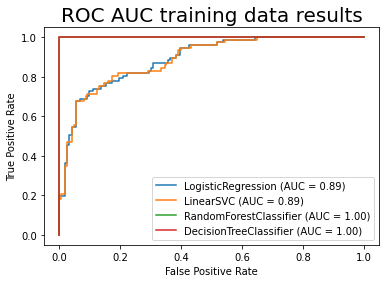

In [ ]:
# ROC AOC plot
lr_plot = plot_roc_curve(lr_model, heart_train_prepared, heart_training_labels)
plot_roc_curve(svm_model, heart_train_prepared, heart_training_labels, ax=lr_plot.ax_)
plot_roc_curve(rf_model, heart_train_prepared, heart_training_labels, ax=lr_plot.ax_)
plot_roc_curve(dt_model, heart_train_prepared, heart_training_labels, ax=lr_plot.ax_)
plt.title("ROC AUC training data results", fontsize = 20);
plt.show()

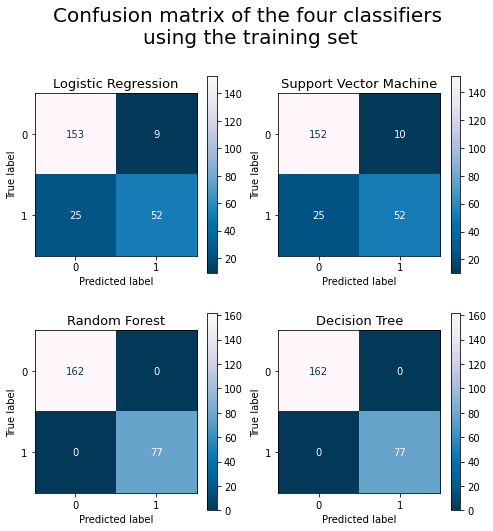

In [ ]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Confusion matrix of the four classifiers \nusing the training set', 
             fontsize = 20, y = 1)

plot_confusion_matrix(lr_model, heart_train_prepared, heart_training_labels, ax=axes[0,0], cmap = "PuBu_r", values_format='.0f')
axes[0,0].set_title('Logistic Regression', fontsize = 13)

plot_confusion_matrix(svm_model, heart_train_prepared, heart_training_labels, ax=axes[0,1], cmap = "PuBu_r", values_format='.0f')
axes[0,1].set_title('Support Vector Machine', fontsize = 13)

plot_confusion_matrix(rf_model, heart_train_prepared, heart_training_labels, ax=axes[1,0], cmap = "PuBu_r", values_format='.0f')
axes[1,0].set_title('Random Forest', fontsize = 13)

plot_confusion_matrix(dt_model, heart_train_prepared, heart_training_labels, ax=axes[1,1], cmap = "PuBu_r", values_format='.0f')
axes[1,1].set_title('Decision Tree', fontsize = 13)

plt.show()

#Tuning the best model and testing the tuned model on the test set

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {
               'n_estimators': [5, 10, 15, 20],
               'max_features': [2, 4, 8, 12]
               }
]
classifer = RandomForestClassifier(random_state=7)
grid_search = GridSearchCV(classifer, 
                           param_grid,
                           cv=6,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(heart_train_prepared, heart_training_labels)

GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=7,
                                   

In [ ]:
cvres = grid_search.cv_results_
cvres
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(round(mean_score, 4), params)

0.795 {'max_features': 2, 'n_estimators': 5}
0.8326 {'max_features': 2, 'n_estimators': 10}
0.8244 {'max_features': 2, 'n_estimators': 15}
0.8244 {'max_features': 2, 'n_estimators': 20}
0.7907 {'max_features': 4, 'n_estimators': 5}
0.8201 {'max_features': 4, 'n_estimators': 10}
0.8119 {'max_features': 4, 'n_estimators': 15}
0.8203 {'max_features': 4, 'n_estimators': 20}
0.7949 {'max_features': 8, 'n_estimators': 5}
0.795 {'max_features': 8, 'n_estimators': 10}
0.8074 {'max_features': 8, 'n_estimators': 15}
0.8201 {'max_features': 8, 'n_estimators': 20}
0.7782 {'max_features': 12, 'n_estimators': 5}
0.7868 {'max_features': 12, 'n_estimators': 10}
0.8034 {'max_features': 12, 'n_estimators': 15}
0.7909 {'max_features': 12, 'n_estimators': 20}


In [ ]:
#0.8327127659574469 {'max_features': 2, 'n_estimators': 15}
grid_search.best_params_

{'max_features': 2, 'n_estimators': 10}

In [ ]:
rf_model_htuned = grid_search.best_estimator_
heart_testing_labels = heart_test_set["DEATH_EVENT"].copy()
heart_test_set.drop("DEATH_EVENT", axis=1, inplace = True)

In [ ]:
heart_test_prepared = full_pipeline.fit_transform(heart_test_set)

In [ ]:
print("Accuracy of the tuned Random Forest model with test data: ", round(rf_model_htuned.score(heart_test_prepared, heart_testing_labels), 4))
print("Accuracy of the Random Forest model with test data: ", round(rf_model.score(heart_test_prepared, heart_testing_labels), 4))

Accuracy of the tuned Random Forest model with test data:  0.9
Accuracy of the Random Forest model with test data:  0.8167


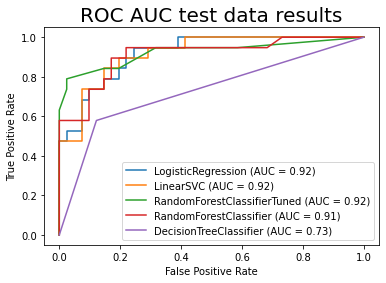

In [ ]:
lr_plot = plot_roc_curve(lr_model,heart_test_prepared , heart_testing_labels)
plot_roc_curve(svm_model, heart_test_prepared, heart_testing_labels, ax=lr_plot.ax_)
plot_roc_curve(rf_model_htuned, heart_test_prepared, heart_testing_labels, ax=lr_plot.ax_, label="RandomForestClassifierTuned (AUC = 0.92)")
plot_roc_curve(rf_model, heart_test_prepared, heart_testing_labels, ax=lr_plot.ax_)
plot_roc_curve(dt_model, heart_test_prepared, heart_testing_labels, ax=lr_plot.ax_)
plt.title("ROC AUC test data results", fontsize = 20);
plt.legend(loc='lower right');

plt.show()